## Unzipping and pre-preprocessing

In [1]:
!pwd

/home/caoyufan/spaCon/contrastive-learning/notebooks


In [2]:
# %%bash
# cd ../data/raw/GSE175540_RAW/
# for file in *;do
#     if [[ $file == *.gz ]]; then
#         gunzip $file
#     fi
# done

In [3]:
# import glob
# import os

# PATH_DIR_GSE175540 = '../data/raw/GSE175540_RAW/'
# all_files = os.listdir(PATH_DIR_GSE175540)

# sub_dirs = glob.glob(PATH_DIR_GSE175540 + '*_aligned_fiducials.jpg')
# sub_dirs = [sub_dir.split('/')[-1].rstrip('_aligned_fiducials.jpg') for sub_dir in sub_dirs]
# # print(sub_dirs)
# for sub_dir in sub_dirs:
#     os.mkdir(PATH_DIR_GSE175540 + sub_dir + 'pump')
#     os.mkdir(PATH_DIR_GSE175540 + sub_dir + 'pump/spatial')
#     sub_dir_files = glob.glob(PATH_DIR_GSE175540 + sub_dir + '_*')
#     for sub_dir_file in sub_dir_files:
#         # print(sub_dir_file)
#         # print(sub_dir)
#         if sub_dir_file.endswith('.h5'):
#             os.rename(sub_dir_file, PATH_DIR_GSE175540 + sub_dir + 'pump/' + sub_dir_file.split('/')[-1][len(sub_dir) + 1:])
#             # print(PATH_DIR_GSE175540 + sub_dir + 'pump/' + sub_dir_file.split('/')[-1][len(sub_dir) + 1:])
#         else:
#             os.rename(sub_dir_file, PATH_DIR_GSE175540 + sub_dir + 'pump/spatial/' + sub_dir_file.split('/')[-1][len(sub_dir) + 1:])
#             # print(PATH_DIR_GSE175540 + sub_dir + 'pump/spatial/' + sub_dir_file.split('/')[-1][len(sub_dir) + 1:])
#     os.rename(PATH_DIR_GSE175540 + sub_dir + 'pump', PATH_DIR_GSE175540 + sub_dir)

## Utilities

## Visualization of the dataset

In [4]:
import os

root_dir = '../data/raw/GSE175540_RAW/'
sub_dirs = os.listdir(root_dir)
print(sub_dirs)

['GSM5924050_frozen_c_2', 'GSM5924038_ffpe_c_36', 'GSM5924034_ffpe_c_10', 'GSM5924049_frozen_b_18', 'GSM5924047_frozen_b_7', 'GSM5924031_ffpe_c_3', 'GSM5924037_ffpe_c_34', 'GSM5924045_frozen_a_17', 'GSM5924046_frozen_b_1', 'GSM5924032_ffpe_c_4', 'GSM5924036_ffpe_c_21', 'GSM5924052_frozen_c_23', 'GSM5924053_frozen_c_57', 'GSM5924043_frozen_a_3', 'GSM5924048_frozen_b_13', 'GSM5924041_ffpe_c_51', 'GSM5924039_ffpe_c_39', 'GSM5924030_ffpe_c_2', 'GSM5924035_ffpe_c_20', 'GSM5924044_frozen_a_15', 'GSM5924042_frozen_a_1', 'GSM5924033_ffpe_c_7', 'GSM5924040_ffpe_c_45', 'GSM5924051_frozen_c_5']


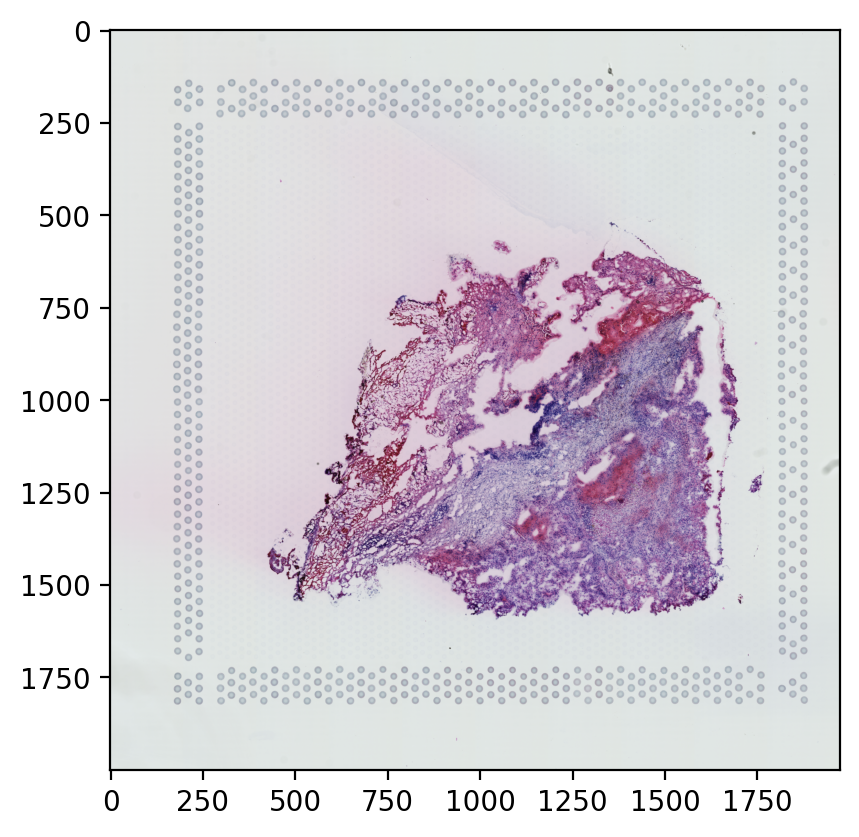

In [5]:
# high resolution plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Read in the histology images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2
import pickle
import json


hist = {}
detection = {}
scale_factors = {}
tissue_positions = {}

for dir in sub_dirs:
    root = root_dir + dir + '/'
    hist_path = root + 'spatial/tissue_hires_image.png'
    hist[dir] = mpimg.imread(hist_path)
    detect_path = root + 'spatial/detected_tissue_image.jpg'
    detection[dir] = mpimg.imread(detect_path)
    sf_path = root + 'spatial/scalefactors_json.json'
    scale_factors[dir] = json.load(open(sf_path))
    tp_path = root + 'spatial/tissue_positions_list.csv'
    tissue_positions[dir] = pd.read_csv(tp_path, header=None).values
    

# Plot one histology image
plt.imshow(hist[sub_dirs[0]])

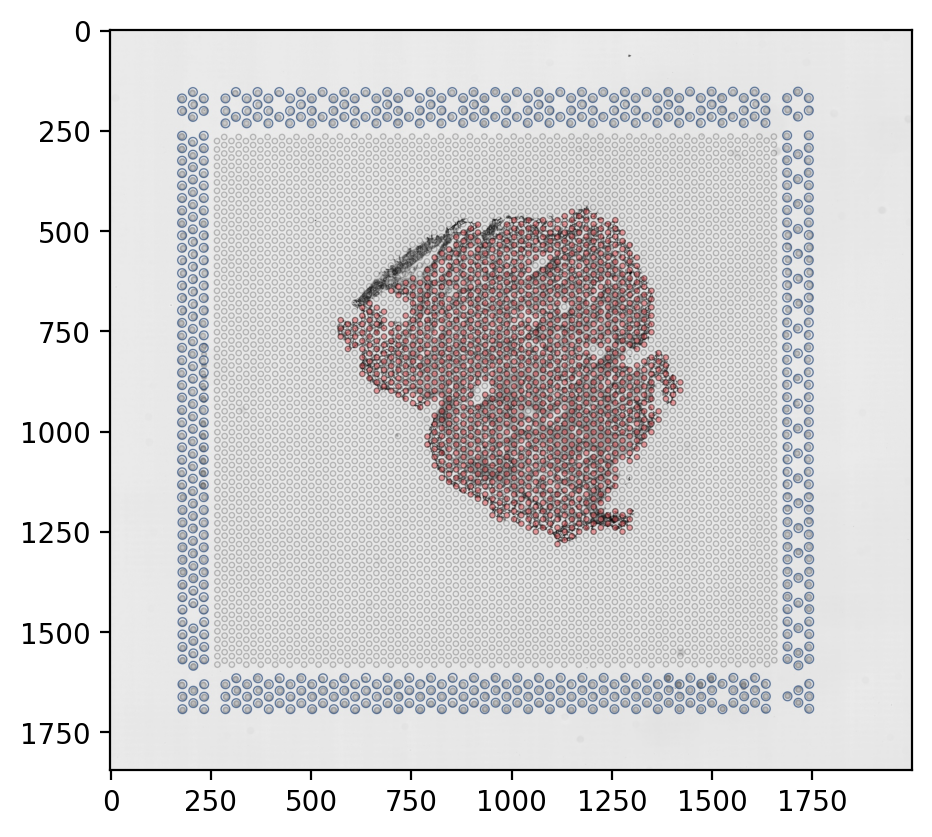

In [6]:
plt.imshow(detection[sub_dirs[3]][:, :, :])

In [7]:
# Plot one histology image
scale_factor = scale_factors[sub_dirs[3]]
scale_factor

{'spot_diameter_fullres': 142.09693999999996,
 'tissue_hires_scalef': 0.09469697,
 'fiducial_diameter_fullres': 229.54121,
 'tissue_lowres_scalef': 0.028409092}

In [8]:
tissue_position = tissue_positions[sub_dirs[3]]
tissue_position

array([['ACGCCTGACACGCGCT-1', 0, 0, 0, 16692, 2824],
       ['TACCGATCCAACACTT-1', 0, 1, 1, 16582, 3014],
       ['ATTAAAGCGGACGAGC-1', 0, 0, 2, 16473, 2824],
       ...,
       ['TACCTCACCAATTGTA-1', 0, 77, 125, 3019, 17460],
       ['AGTCGAATTAGCGTAA-1', 0, 76, 126, 2910, 17270],
       ['TTGAAGTGCATCTACA-1', 0, 77, 127, 2801, 17460]], dtype=object)

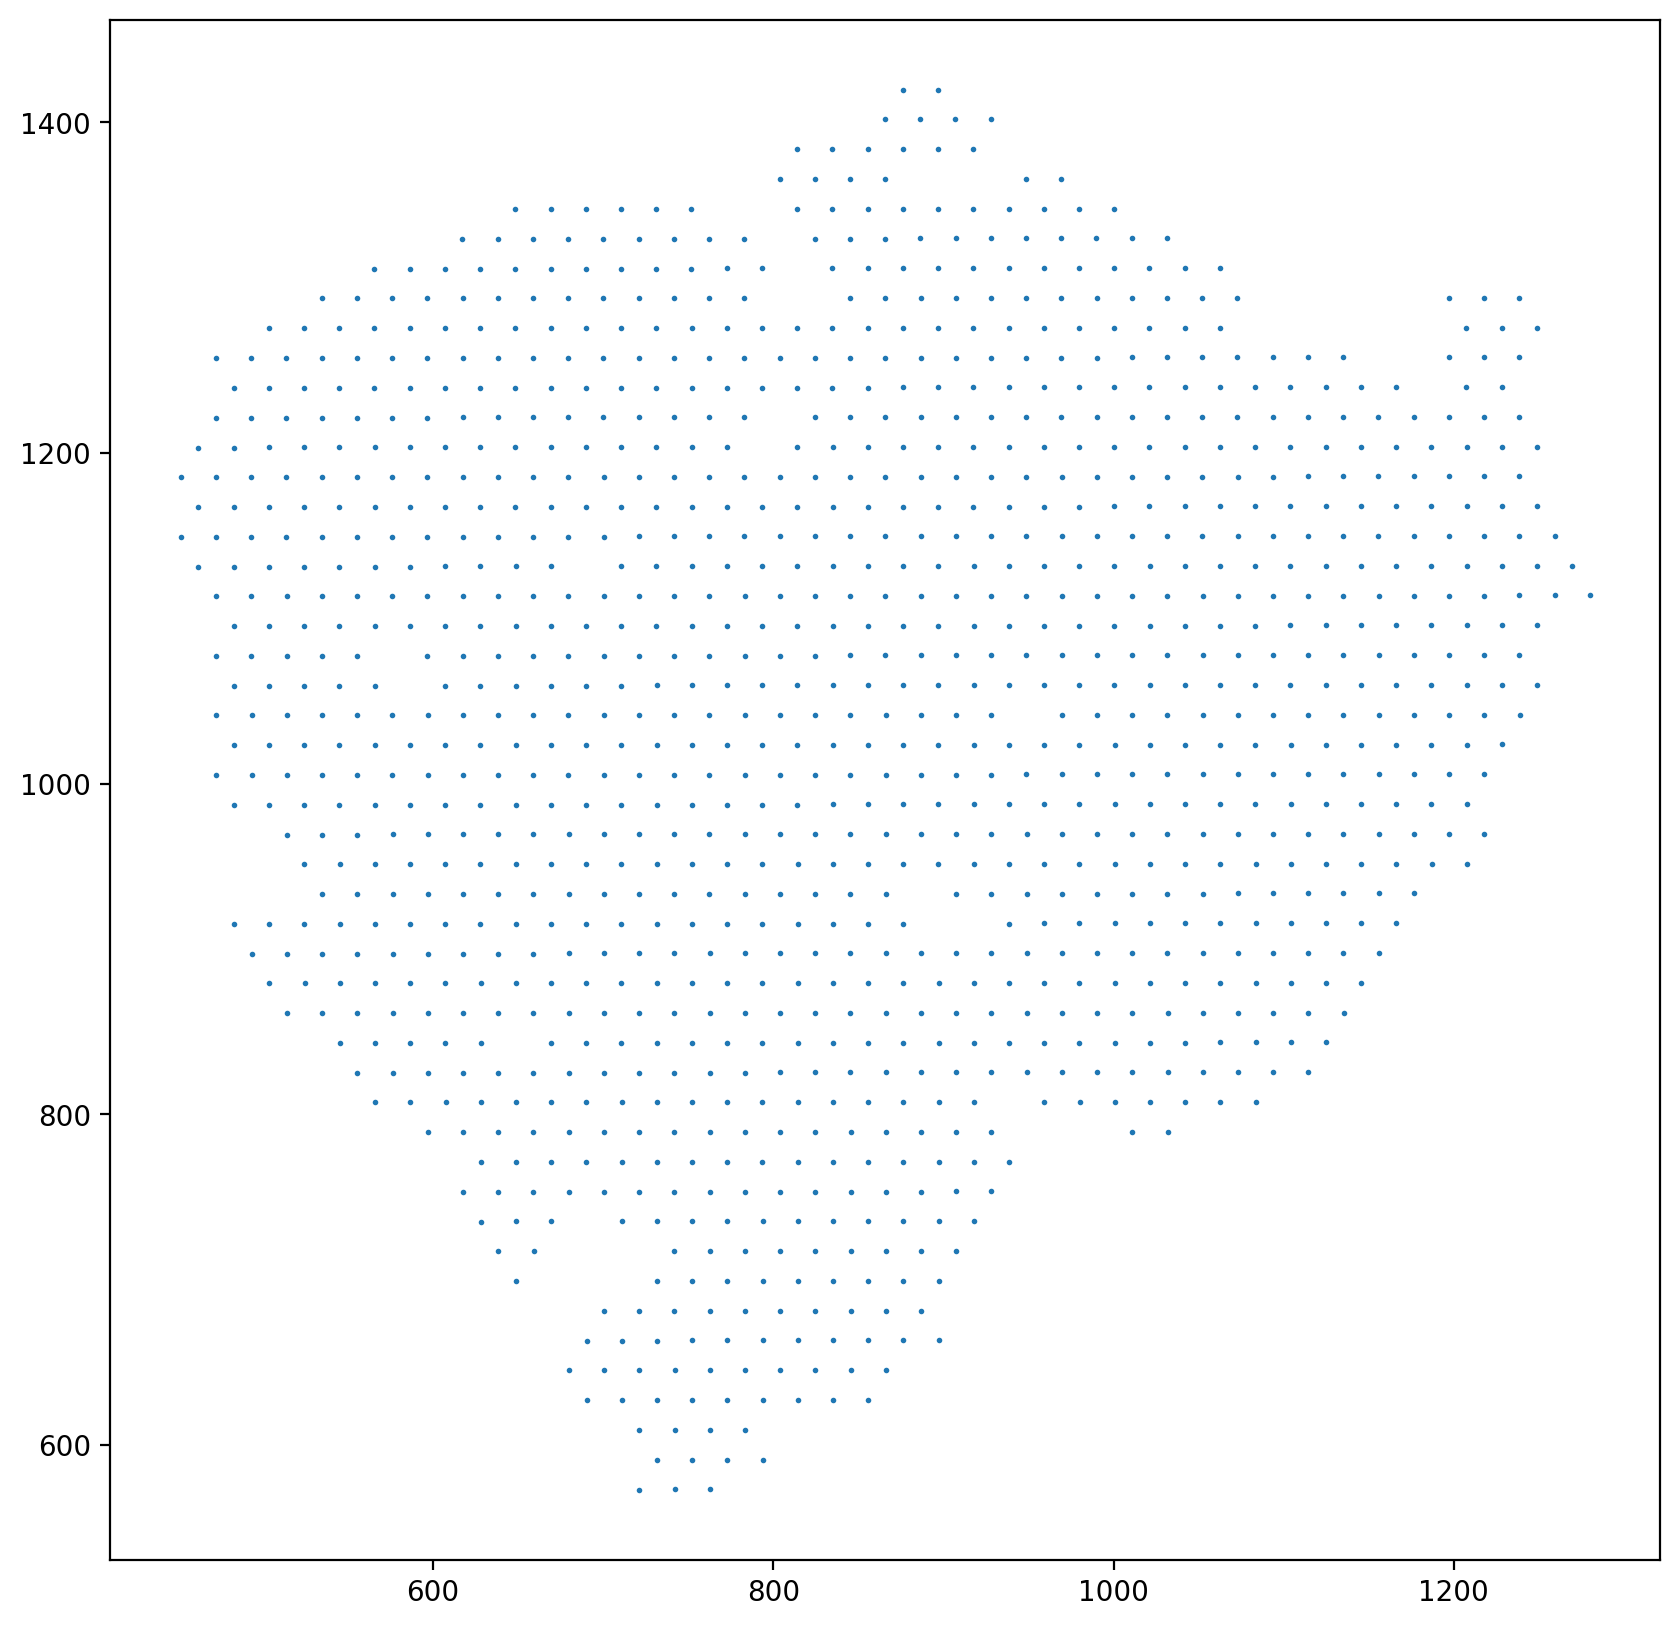

In [9]:
pos1 = [tp[4] for tp in tissue_position]
pos2 = [tp[5] for tp in tissue_position]
in_tissue = [tp[1] for tp in tissue_position]

in_tissue = np.array(in_tissue, dtype=bool)

pos1, pos2 = np.array(pos1), np.array(pos2)
pos1, pos2 = pos1 * scale_factor['tissue_hires_scalef'], pos2 * scale_factor['tissue_hires_scalef']
pos1, pos2 = pos1[in_tissue], pos2[in_tissue]

plt.figure(figsize=(10, 10))

plt.scatter(pos1, pos2, s=1)

In [10]:
import os
import sys
sys.path.append('../../super-resolution/src')

from dataset import registerSpotWeb, computeWebConstants, generateHexMask, generateMaskForHexImg


In [11]:
spotWeb = registerSpotWeb(tissue_position=tissue_position, scaling_factor=scale_factor, fig_type='hires')
spotWeb

array([[<dataset.spot object at 0x7f3f84a51850>, None,
        <dataset.spot object at 0x7f3f873e87d0>, ..., None,
        <dataset.spot object at 0x7f3f84a673d0>, None],
       [None, <dataset.spot object at 0x7f408a44ff10>, None, ...,
        <dataset.spot object at 0x7f3f84a67390>, None,
       [<dataset.spot object at 0x7f3f84a67450>, None,
        <dataset.spot object at 0x7f3f84a674d0>, ..., None,
        <dataset.spot object at 0x7f3f84a75410>, None],
       ...,
       [None, <dataset.spot object at 0x7f3f847c3910>, None, ...,
        <dataset.spot object at 0x7f3f847dd850>, None,
       [<dataset.spot object at 0x7f3f847dd910>, None,
        <dataset.spot object at 0x7f3f847dd990>, ..., None,
        <dataset.spot object at 0x7f3f847df890>, None],
       [None, <dataset.spot object at 0x7f3f847dd950>, None, ...,
        <dataset.spot object at 0x7f3f847df850>, None,
        <dataset.spot object at 0x7f3f847df8d0>]], dtype=object)

In [13]:
conv = generateMaskForHexImg(spotWeb, hist[sub_dirs[3]])

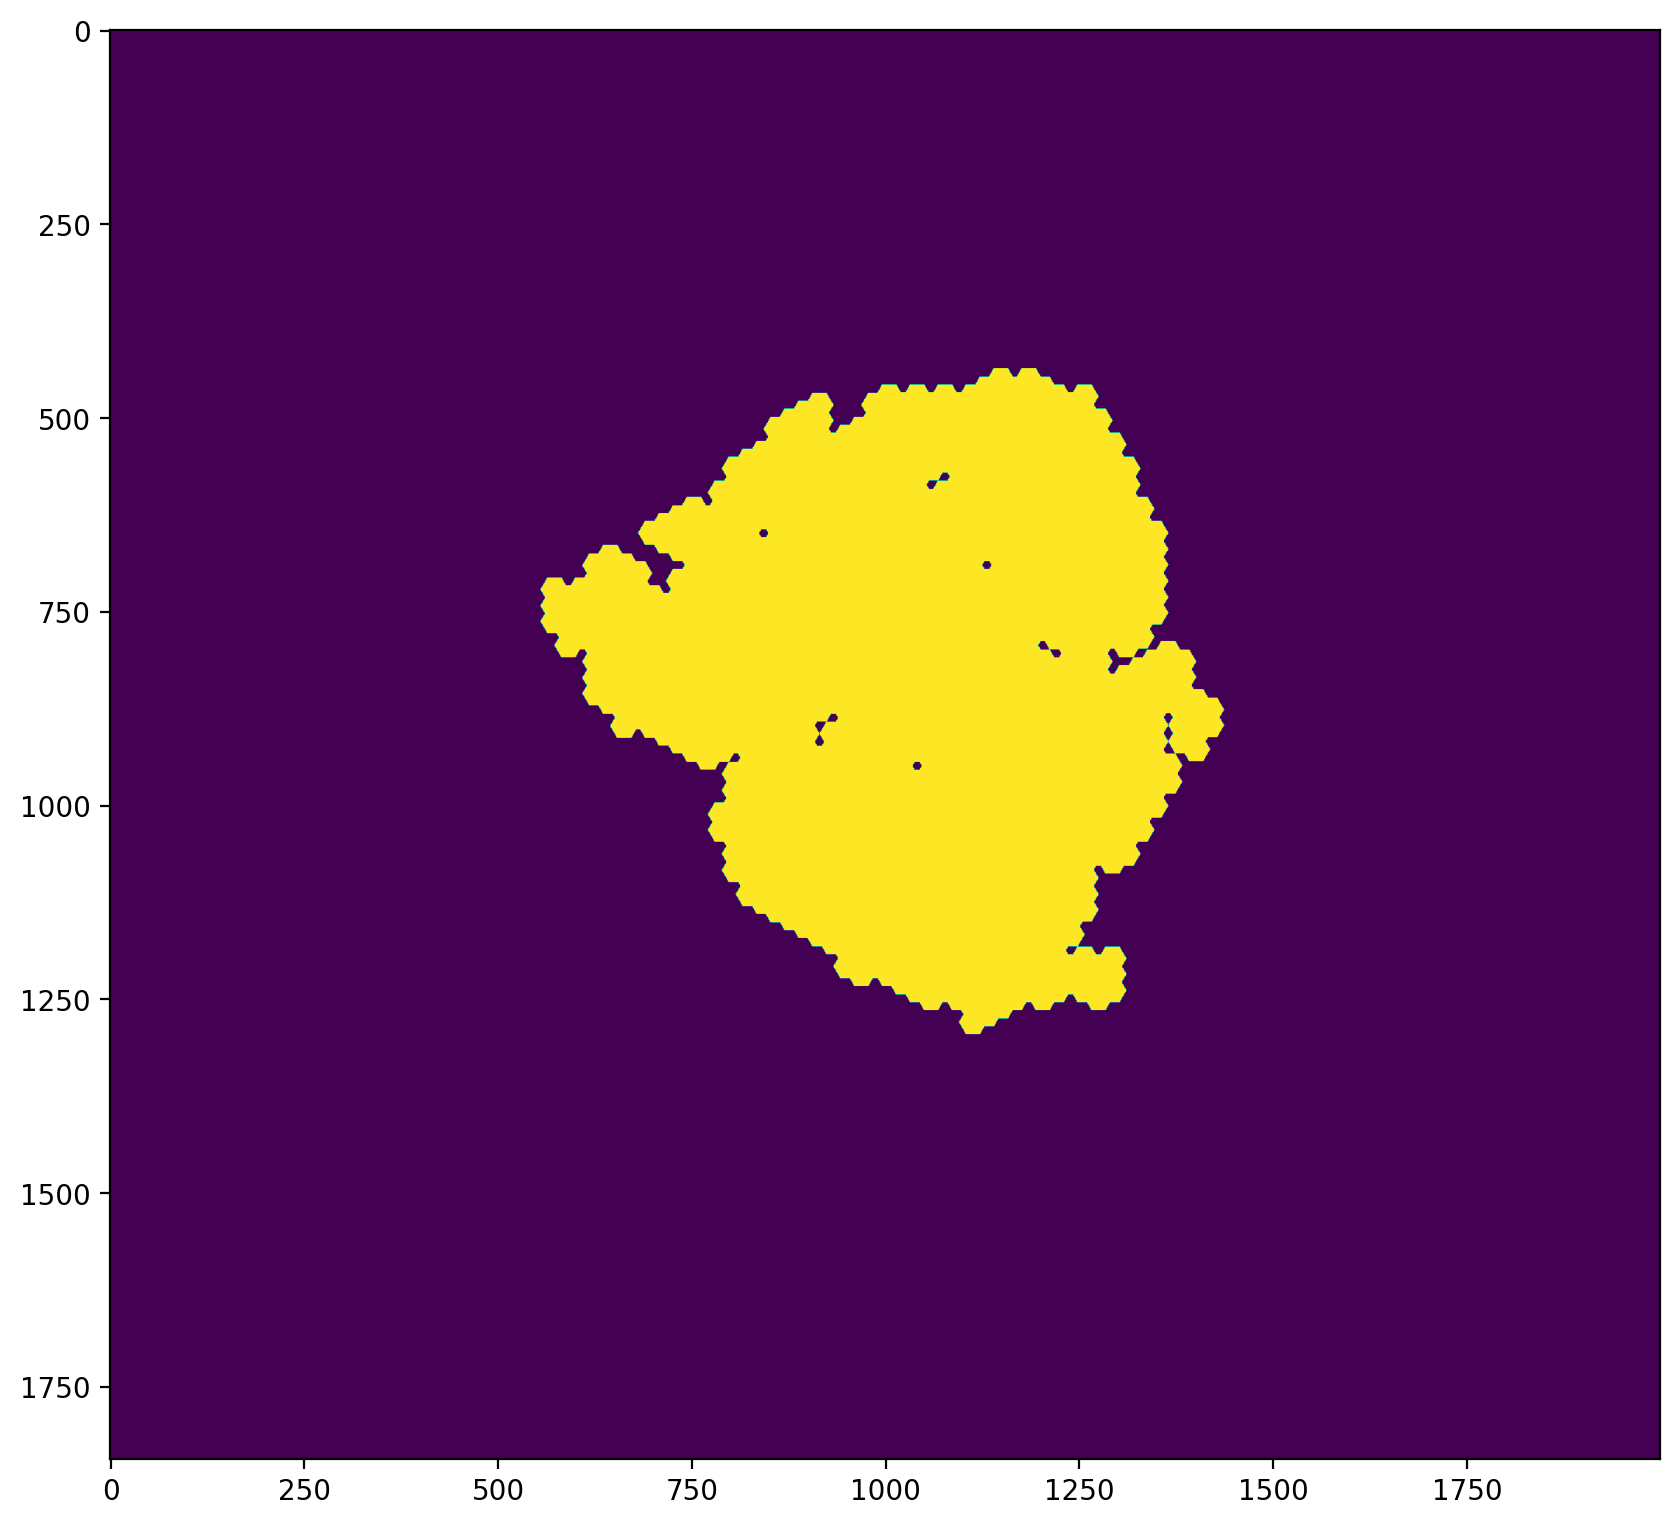

In [14]:
# print((conv * 255).astype(np.uint8))

# plot heatmap

plt.figure(figsize=(10, 10))
tmp = (conv * 255).astype(np.uint8)
# binarize image
tmp[tmp > 200] = 1
plt.imshow(tmp)

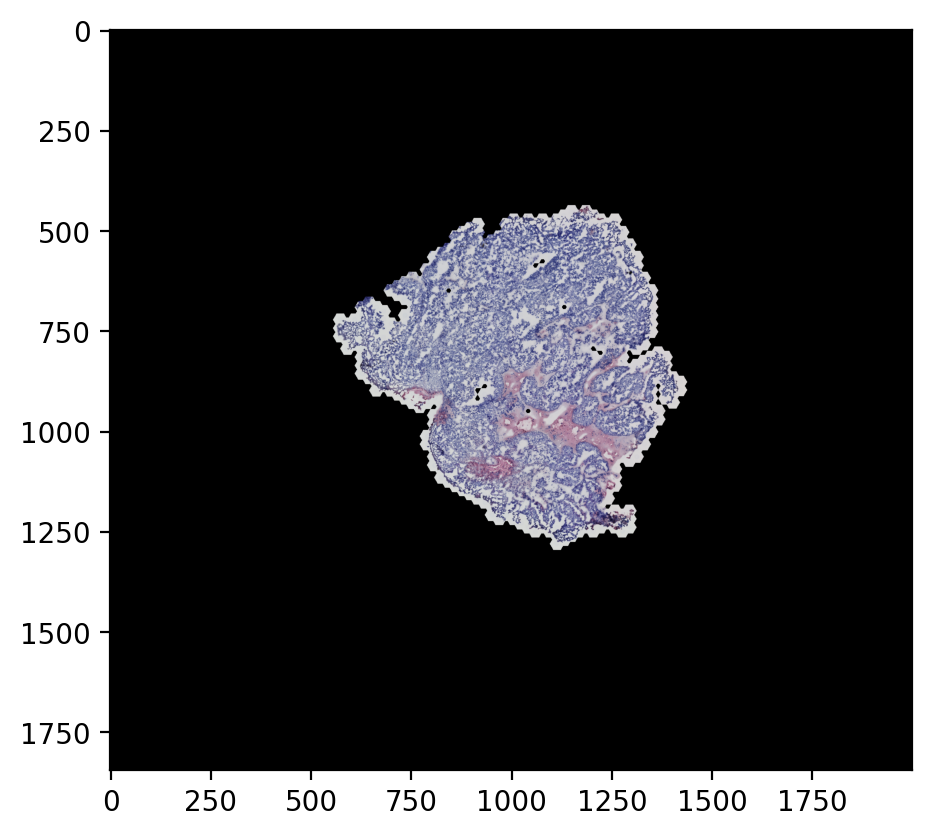

In [16]:
# apply mask
masked = hist[sub_dirs[3]].copy()
masked = masked * np.expand_dims(tmp, axis=-1)
plt.imshow(masked)

In [1]:
import scanpy as sc

path = '../../contrastive-learning/data/raw/GSE175540_RAW/GSM5924030_ffpe_c_2/'

adata = sc.read_visium(path)

adata

/home/caoyufan/miniconda3/envs/spacon/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/caoyufan/miniconda3/envs/spacon/lib/python3.11/site-packages/anndata/_core/anndata.py:1900: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4510 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [5]:
import numpy as np

np.all(np.array(adata.obs['in_tissue']))

True

In [12]:
adata.uns['spatial']['bionikk_01_006']['images']['hires'].shape

(1958, 2000, 3)

In [17]:
adata.obs['array_row'].values.reshape(-1, 1)

array([[ 0],
       [50],
       [ 3],
       ...,
       [45],
       [73],
       [ 7]])

In [21]:
def constructHexGraph(row_idx, col_idx):
    
    rel_idx = [(0, 2), (1, 1), (1, -1)]
    
    # order by tissue position
    
    assert row_idx.shape == col_idx.shape, "row_idx and col_idx must have the same shape"
    
    pos_idx = np.concatenate((row_idx.reshape(-1, 1), col_idx.reshape(-1, 1)), axis=1)
    pos_dict = {}
    for i in range(pos_idx.shape[0]):
        pos_dict[tuple(pos_idx[i])] = i
        
    # construct graph
    edge_idx = []
    for i in range(pos_idx.shape[0]):
        for j in range(3):
            if tuple(pos_idx[i] + rel_idx[j]) in pos_dict:
                edge_idx.append([i, pos_dict[tuple(pos_idx[i] + rel_idx[j])]])
    
    edge_idx = np.array(edge_idx)
    edge_idx = np.concatenate((edge_idx, edge_idx[:, [1, 0]]), axis=0)
    edge_idx = edge_idx.astype(int).T
    
    return edge_idx


In [22]:
row_idx = adata.obs['array_row'].values
col_idx = adata.obs['array_col'].values

edge_idx = constructHexGraph(row_idx, col_idx)
edge_idx

array([[   0,    0,    0, ..., 1924, 4245, 2655],
       [1423, 1157, 3377, ..., 4509, 4509, 4509]])

In [26]:
adata.X

<4510x17943 sparse matrix of type '<class 'numpy.float32'>'
	with 14044757 stored elements in Compressed Sparse Row format>